In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tools.basic.loadsavejson import loadjson
import glob
from model.post.post_processing import post_processing
import pandas as pd
import os


In [2]:
results_exp      = loadjson("../T04_validation/T01_preprocessing/data/results.json")
results_exp_mono = loadjson("../../C01_MultiYarn/validation/data/results.json")


In [3]:
df_mono = results_exp_mono["df_exp"]["exp 1"]   
max_mono = df_mono["stress [MPa]"].max()


In [4]:
max_mono

142.44049931436967

In [5]:
paths = glob.glob("output/*")
# sort paths 
paths = sorted(list(set(paths)))
#
path_last = paths[-1]
# 
sim_path = glob.glob(path_last + "/*")

In [6]:
varjson = [path for path in sim_path if "vars.json" in path][0]
sim_path = [path for path in sim_path if "vars.json" not in path]
# remove if not exist
sim_path = [path for path in sim_path if os.path.exists(os.path.join(path,"simulation"))]
# sort paths
sim_path = sorted(list(set(sim_path)))

In [7]:
sim_path

['output/2024-01-22__14-53-22__50418/2024-01-22__14-53-22__15024',
 'output/2024-01-22__14-53-22__50418/2024-01-22__19-34-49__16165',
 'output/2024-01-22__14-53-22__50418/2024-01-23__01-50-14__36219',
 'output/2024-01-22__14-53-22__50418/2024-01-23__08-24-58__31529',
 'output/2024-01-22__14-53-22__50418/2024-01-23__09-52-57__21258']

In [8]:
sim_path
df = pd.DataFrame(sim_path)
sim_path[0]

'output/2024-01-22__14-53-22__50418/2024-01-22__14-53-22__15024'

In [9]:
varjson

'output/2024-01-22__14-53-22__50418/vars.json'

In [10]:


results = []
ids = sim_path
for id in ids:
    results.append(post_processing(os.path.join(id,"simulation"),
                                   force_recompute=False,
                                   max_mono=max_mono))
    
# last
    
post_processing(os.path.join(ids[-1],"simulation"),
                                   force_recompute=True,
                                   max_mono=max_mono)

Read frd
--------------------


Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 127.30it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 126.98it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 127.13it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 126.86it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 127.39it/s]


{'measurements': [{'sigma_max': 70.85781144706516,
   'A_total': 1.5350381281746173,
   'F_total': 8.946341957777816,
   'sigma': 13.230216914749276,
   'sigma_tren': 5.828091037983737,
   'Delta_L': 0.002000000000000668,
   'mt': [[7.056516105200822,
     4.735750559994885,
     4.731883706616103,
     4.965341586322989,
     4.81112075081803,
     8.088448398506822,
     28.240018547817623,
     37.9950013035912,
     44.662665697797955,
     67.08737878926235,
     19.76005517896242,
     6.302556714460837,
     1.4038256132592082,
     2.0986640685819156,
     3.027491663000032,
     6.831344462831791,
     4.946347761129025,
     8.59434813959473,
     8.305069435803283,
     10.549501887629008],
    [15.8245970123211,
     3.220894398906319,
     5.5389036643259155,
     1.7881125683648824,
     4.333535580024908,
     5.408540616451665,
     8.979010137380927,
     11.767160919074088,
     29.42535123951835,
     29.649159096064544,
     27.679082476801103,
     30.9545438743682

In [11]:
factor_npoints = [ r["lsdyna_params"]["factor_npoints"] for r in results]
ratio_new = [ r["measurements"][-1]["ratio_new"] for r in results]
pressure = [ r["infl_params"]["pressure"] for r in results]
best_ratio =  [r ["best_ratio"] for r in results]
inflation_path = [r["infl_params"]["output_folder"] for r in results]
inflation_path = [path.split("/")[1] for path in inflation_path]

In [12]:
results[0].keys()

dict_keys(['measurements', 'frd', 'infl_params', 'simu_params', 'lsdyna_params', 'best_ratio', 'ind_ms'])

In [13]:
df_main = pd.DataFrame()
# size= factor_npoints , output_folder = ids
df_main["size"] = factor_npoints
df_main["output_folder"] = ids
df_main["last_ratio"] = ratio_new
df_main["last_ratio"] = df_main["last_ratio"].round(2)
df_main["best_ratio"] = best_ratio
df_main["best_ratio"] = df_main["best_ratio"].round(2)
df_main["inflation"] = pressure
df_main["inf_path"] = inflation_path
# sort by ratio
df_main = df_main.sort_values(by=["best_ratio"],ascending=False)


In [14]:
df_main

,size,output_folder,last_ratio,best_ratio,inflation,inf_path
4,0.160785,output/2024-01-22__14-53-22__50418/2024-01-23_...,1.92,1.92,800,2024-01-22__14-53-22__50418
3,0.239647,output/2024-01-22__14-53-22__50418/2024-01-23_...,1.50,1.44,800,2024-01-22__14-53-22__50418
2,0.316685,output/2024-01-22__14-53-22__50418/2024-01-23_...,1.15,0.96,800,2024-01-22__14-53-22__50418
0,0.462963,output/2024-01-22__14-53-22__50418/2024-01-22_...,0.57,0.57,800,2024-01-22__14-53-22__50418
1,0.391313,output/2024-01-22__14-53-22__50418/2024-01-22_...,0.59,0.52,800,2024-01-22__14-53-22__50418


In [15]:
def evolutions(results):

    n_results = len(results["measurements"])
    # padding 
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    nsq = int(np.ceil(np.sqrt(n_results)))
    if nsq**2 < n_results:
        nsq += 1
    max_sigma = np.max([np.max(r["mt"]) for r in results["measurements"]])

    for j,r in enumerate(results["measurements"]):
        plt.subplot(nsq,nsq,j+1)
        mt,mt_z = r["mt"],r["mt_z"]
        for iyarn in range(len(mt_z)):
            z = mt_z[iyarn]
            plt.plot(z,mt[iyarn],'.-')
        plt.xlabel("z [mm]")
        plt.ylabel("Mean Disk stress (P1)[MPa]")
        plt.ylim([0,200])
        plt.title(results["frd"]["steps"][j])
        plt.ylim([0,max_sigma])

        
        plt.grid()

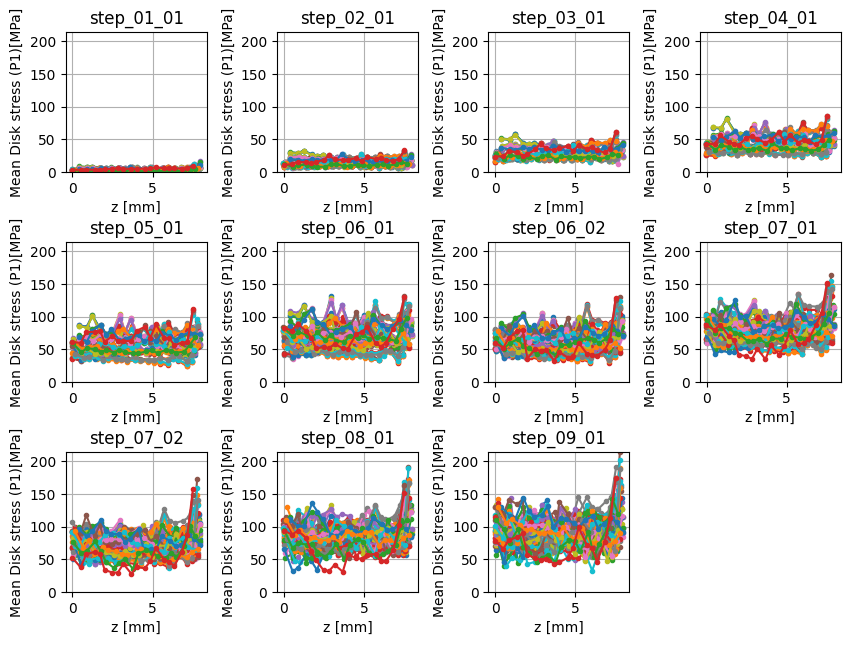

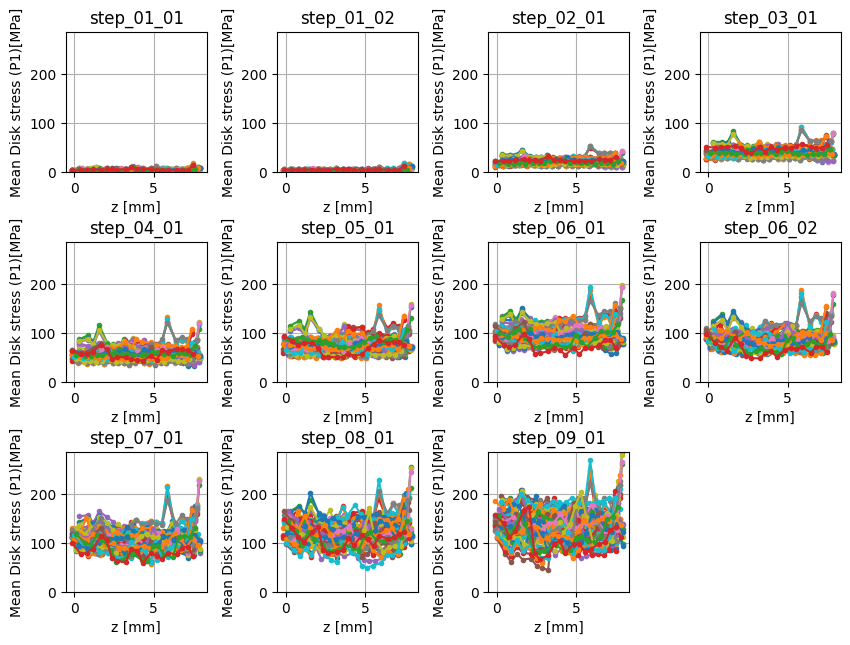

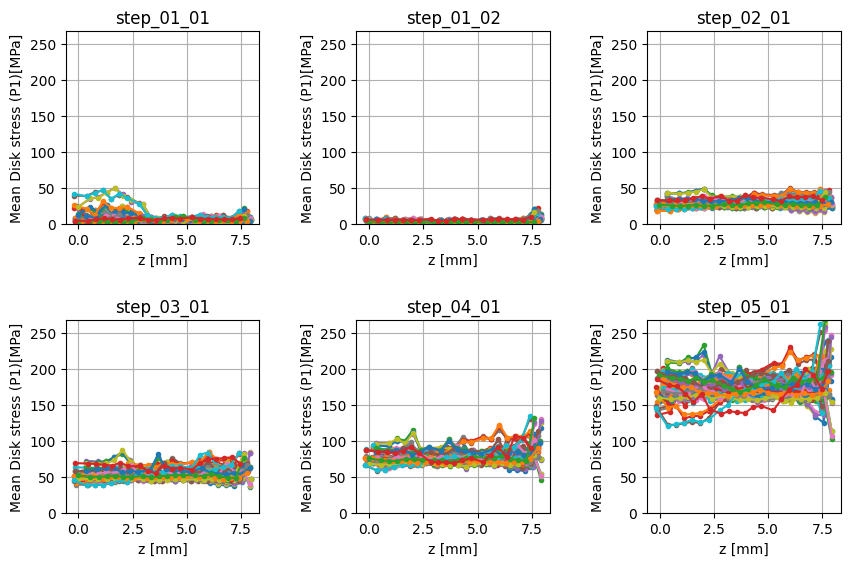

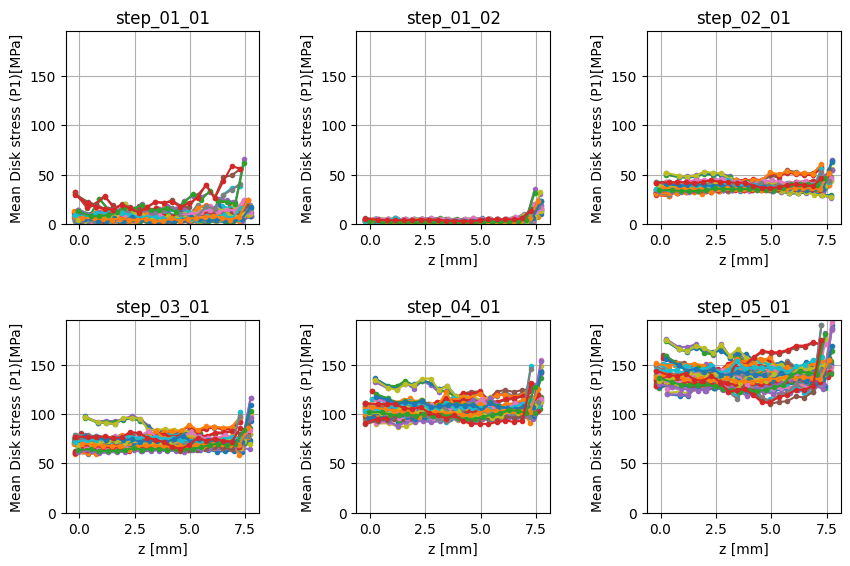

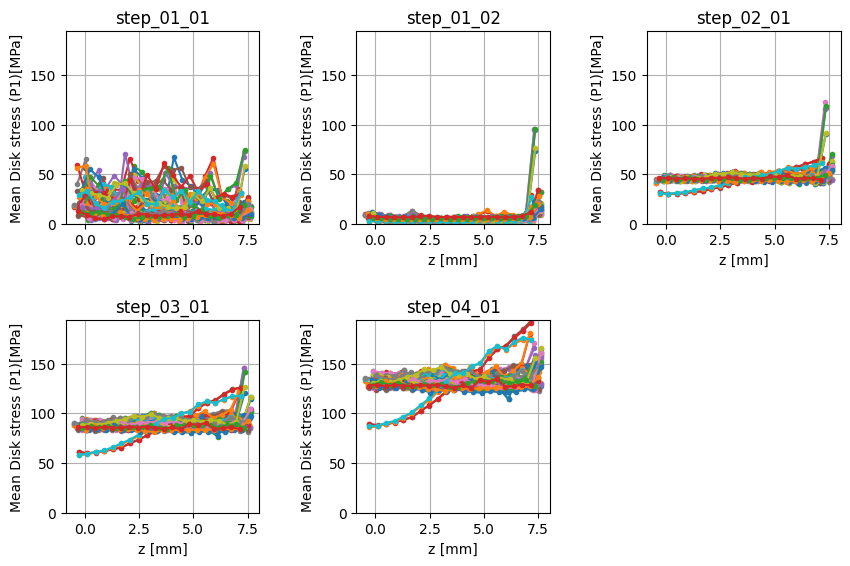

In [16]:
for i in range(len(results)):
    fig = plt.figure(figsize=(10,10))

    evolutions(results[i])



In [17]:

def sigmas(results,name=""):

    step_str =  [ i[:7 ] for i in results["frd"]["steps"] ]
    step_str = np.array(step_str)    
    step_str_uq = np.unique(step_str)
    #
    indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]
    #
    ms_select = [ results["measurements"][i] for i in indx]
    epsilons = [ r["epsilon"]   for r in ms_select]
    F_total  = [ r["F_total"]   for r in ms_select]
    ratio    = [ r["ratio"]     for r in ms_select]
    sigma_max= [ r["sigma_max"] for r in ms_select]
    ratio_new= [ r["ratio_new"] for r in ms_select]
    angle = results["infl_params"]["theta"]
    #
    p = results["infl_params"]["pressure"] 
    nonlinear = results["simu_params"]["nonlinear"]
    nonlinear = "nonlinear" if nonlinear else "linear"
    #name = name + " [" + str(p) + " MPa ] | " + nonlinear
    name = r"$ \theta = " + str(round(180*angle/np.pi)) + r" ^\circ $ " 
    # ==============================================
    #pading
    plt.subplots_adjust(wspace=0.25,hspace=0.25)

    plt.subplot(2,2,1)
    plt.plot(epsilons,ratio,
             label=name,
             marker="o")
    
    plt.xlabel(r"$\epsilon$")
    plt.ylabel("r")
    plt.title("Ratio")
    plt.legend()
    plt.grid()
    # ==============================================
    plt.subplot(2,2,2)

    plt.plot(epsilons,sigma_max,
             label=name,
             marker="o")
    
    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$\sigma_{max}$  [MPa]")
    plt.title("Maximun stress of all yarns")
    plt.legend()

    plt.grid()
    # ==============================================

    plt.subplot(2,2,3)

    plt.plot(epsilons,F_total,label=name,marker="o")

    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$F_apl$  [N]")
    plt.title("Total applied force")
    # outside legend
    plt.legend()

    plt.grid()

    # ==============================================
    plt.subplot(2,2,4)

    plt.plot(epsilons,ratio_new,label="ratio_new" + " " + name,marker="o")
    ratio_exp = 0.82
    # horizontal line
    xlim = plt.gca().get_xlim()
    plt.plot([0,0.5],[ratio_exp,ratio_exp],'--',color="black")
    plt.xlim(xlim)
    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$r_{c}$")
    plt.title("Ratio")
    plt.grid()
    plt.legend()



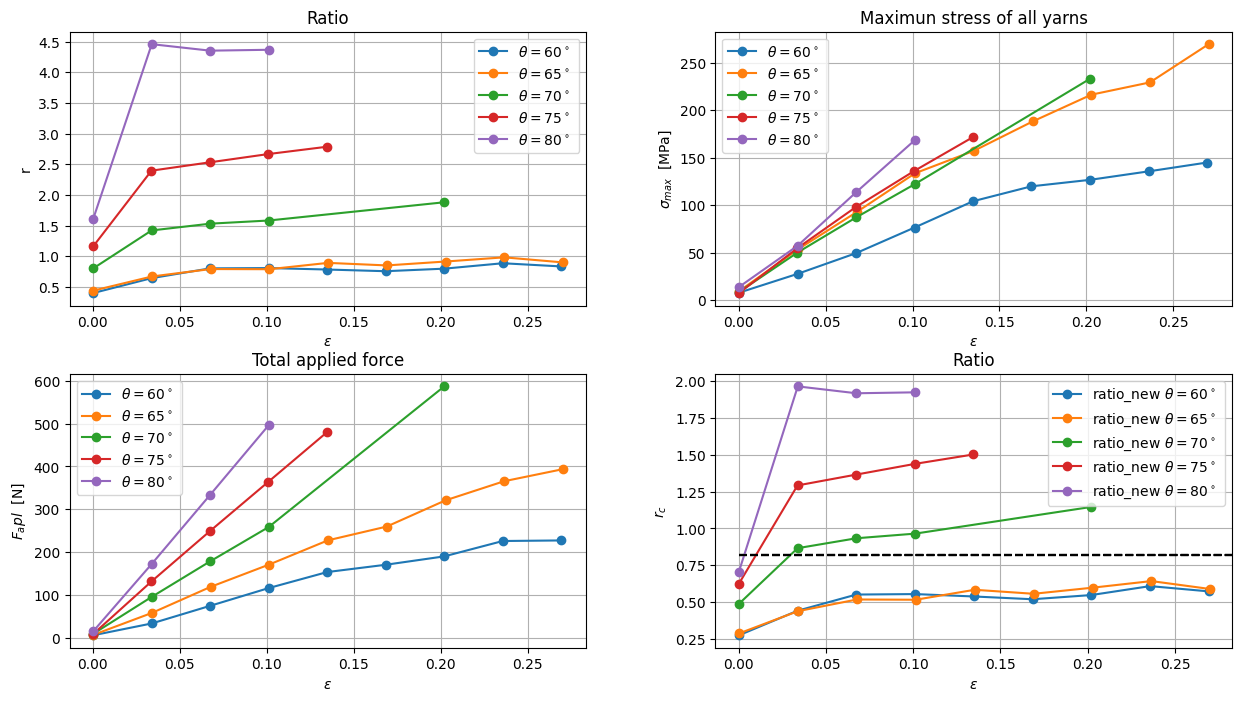

In [18]:
fig = plt.figure(figsize=(15,8))
for i, r in enumerate(results):
    sigmas(r,name=str(i))


In [19]:

def strain_stress(results_exp_mono,results_exp,results,index):

    step_str =  [ i[:7 ] for i in results["frd"]["steps"] ]
    step_str = np.array(step_str)    
    step_str_uq = np.unique(step_str)
    #
    indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]
    p = results["infl_params"]["pressure"]
    nonlinear = results["simu_params"]["nonlinear"]
    nonlinear = "nonlinear" if nonlinear else "linear"

    size = results["lsdyna_params"]["factor_npoints"]
    angle = results["infl_params"]["theta"]*(180/np.pi) 

    df_mono = results_exp_mono["df_exp"]["exp 1"]
    measurements = results["measurements"]
    ms_select = [ measurements[i] for i in indx]

    epsilons  =  [ r["epsilon"]    for r in ms_select]
    sigma     =  [ r["sigma"]      for r in ms_select]
    sigma_max =  [ r["sigma_max"]  for r in ms_select]
    sigma_tren=  [ r["sigma_tren"] for r in ms_select]
    # ==============================================
    plt.plot(epsilons,sigma_max,
             label  = r"$\sigma_{mono}$",
             marker = "o",
             color  = "red",
             ms     = 5 )
    plt.plot(epsilons,sigma_tren,
             label  = r"$\sigma_{Braid}$",
             marker = "o",
             color  = "green",
             ms     =5 )

    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$\sigma \ [MPa]$")
    steps = results["frd"]["steps"]

    for i in range(len(indx)):
        text_text = steps[indx[i]].split("_")
        text_text = "$s_{"+str(text_text[1])+"}"+"^{"+str(text_text[2])+"}$"
        plt.text(epsilons[i],sigma_max[i],
                 text_text,rotation=0,ha="center",va="center")

    plt.plot(results_exp["df_exp_1"]["strain [-]"],
             results_exp["df_exp_1"]["stress [MPa]"],
            label="Braid Exp.",ls="--",color="green")


    # plot df_mono
#     plt.plot(df_mono["strain [-]"],
#              df_mono["stress [MPa]"],
#             label="Mono Exp.",ls="--",color="red")

    max_mono = df_mono["stress [MPa]"].max()
    max_braid = results_exp["df_exp_1"]["stress [MPa]"].max()
    # line
    plt.plot([0,1],[max_mono,max_mono],ls="-",color="red",alpha=0.2)
    plt.plot([0,1],[max_braid,max_braid],ls="-",color="green",alpha=0.2)

    step = results["ind_ms"]
    
    ratio     = results["measurements"][step]["ratio"]
    new_ratio = results["measurements"][step]["ratio_new"]
    
    # title = "("+str(index)+")"+" Ratio: "+str(round(new_ratio,2))+\
    #         " | "+str(p)+" [MPa]" + " (" + nonlinear + ")" + " | " + str(round(size*100)) + "%"
    title = "("+str(index)+")"+" Ratio: "+str(round(new_ratio,2))+\
            " | Inflation "+str(p)+r" [MPa] | $\theta = "+str(round(angle,0))+r"^\circ$"
    plt.title(title,fontsize=10)
    plt.grid()
    plt.xlim(0,0.2)
    plt.ylim(0,50)
    plt.legend(fontsize=8)

    #
    # take ylim interval
    e = epsilons[step]
    plt.vlines(e,0,max_mono,color="black",ls="--",alpha=0.5)

    return epsilons

In [20]:
epsilons  =  [ r["epsilon"]    for r in results[-1]["measurements"]]
epsilons

[0.0002523424603178695,
 0.0002523424603178695,
 0.033940060912742355,
 0.0675016081350078,
 0.10118932658743184]

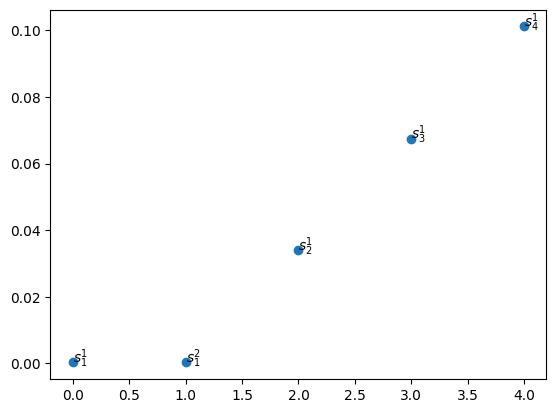

In [21]:
plt.plot(epsilons,'o')
#text
steps = results[-1]["frd"]["steps"]
for i in range(len(epsilons)):
    st = steps[i].split("_")
    st = "$s_{"+str(int(st[1]))+"}"+"^{"+str(int(st[2]))+"}$"
    plt.text(i,epsilons[i],st)

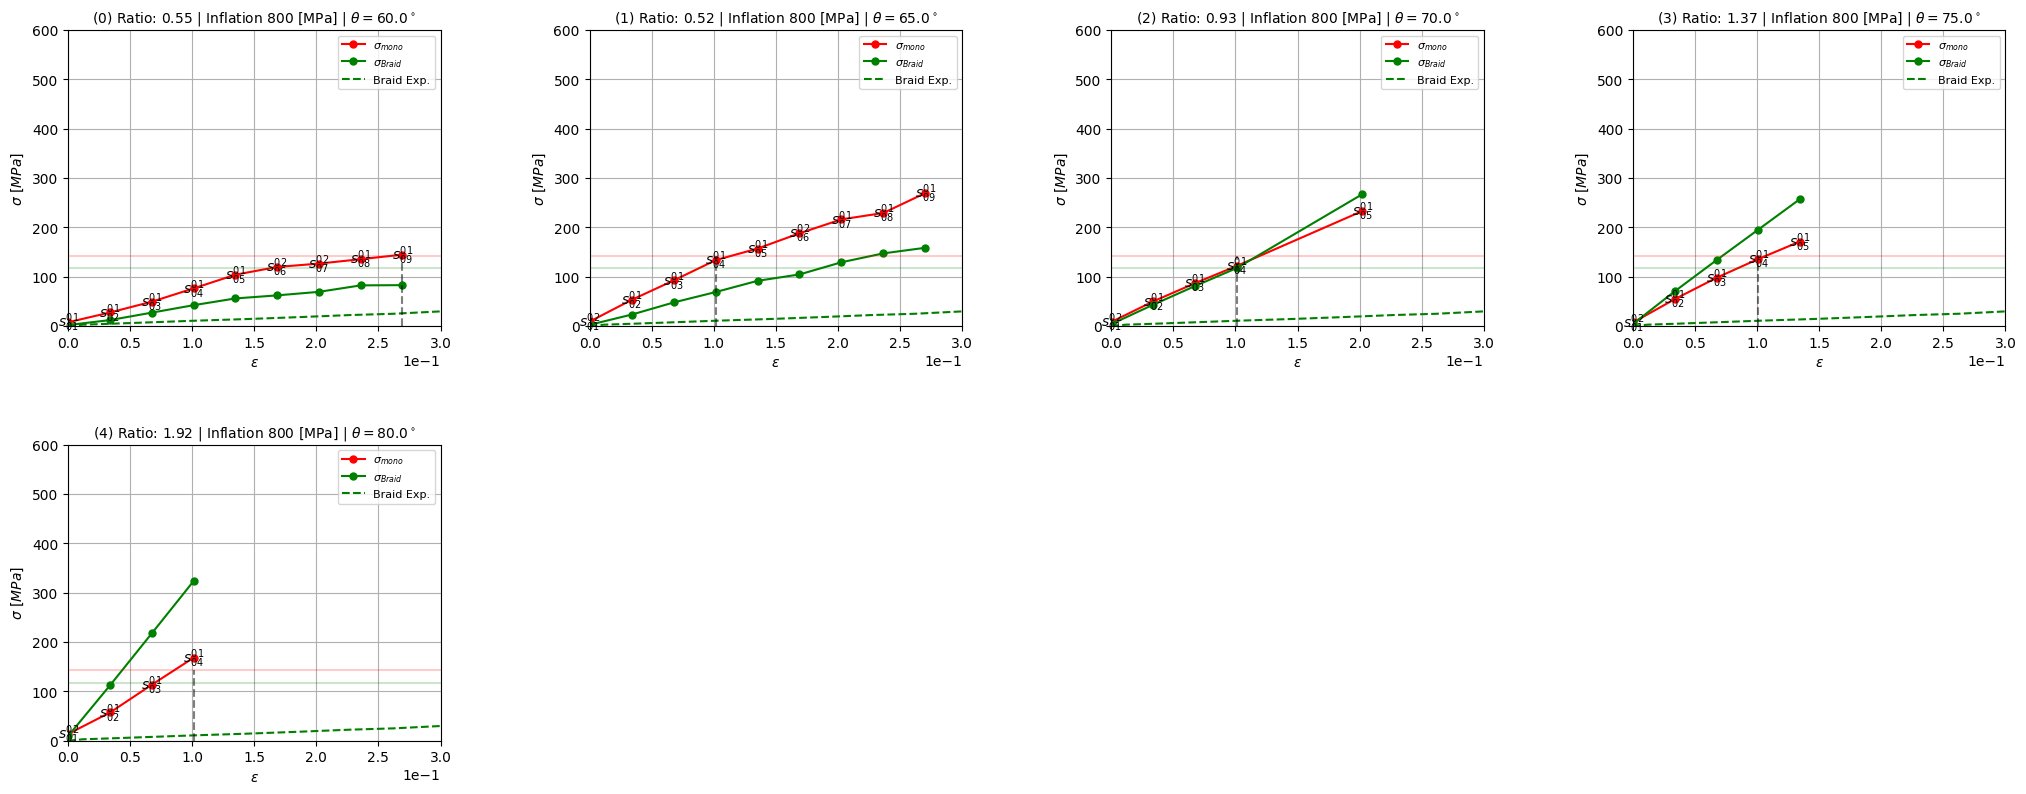

In [22]:

xlim = [0,0.3]
#xlim = [0,1.3]

ylim = [0,600]
fig = plt.figure(figsize=(25,20))
# subplot padding
plt.subplots_adjust(hspace=0.4,wspace=0.4)

for i in range(len(results)):
    plt.subplot(4,4,1+i)
    strain_stress(results_exp_mono,results_exp,results[i],i)
    plt.xlim(xlim)
    plt.ylim(ylim)
    # xticks sciencetific notation
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))


In [23]:
results[0].keys()

dict_keys(['measurements', 'frd', 'infl_params', 'simu_params', 'lsdyna_params', 'best_ratio', 'ind_ms'])

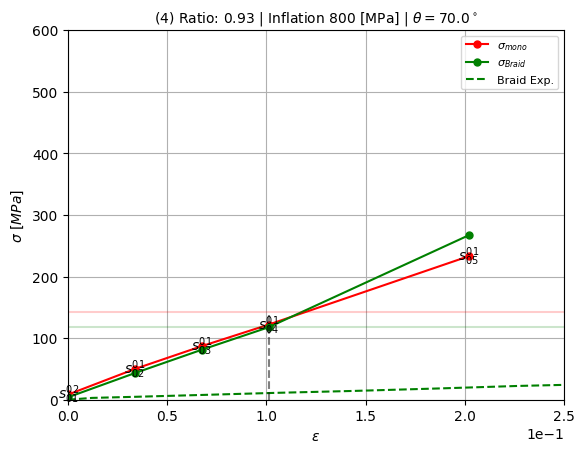

In [24]:

xlim = [0,0.25]
#xlim = [0,1.3]

ylim = [0,600]
fig = plt.figure()
# subplot padding

strain_stress(results_exp_mono,results_exp,results[2],i)
# vertical line
plt.xlim(xlim)
plt.ylim(ylim)
# xticks sciencetific notation
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))


In [25]:
sigma_mono_rot = results_exp_mono["df_exp"]["exp 1"]["stress [MPa]"].values
sigma_mono_rot = np.max(sigma_mono_rot)
#
sigma_tren_rot = results_exp["df_exp_1"]["stress [MPa]"].values
sigma_tren_rot = np.max(sigma_tren_rot)

In [26]:
deniers = [r["infl_params"]["denier_per_filament"] for r in results]
ratios  = [r["best_ratio"] for r in results]
#angle 
angles = [r["infl_params"]["theta"]*(180/np.pi) for r in results]


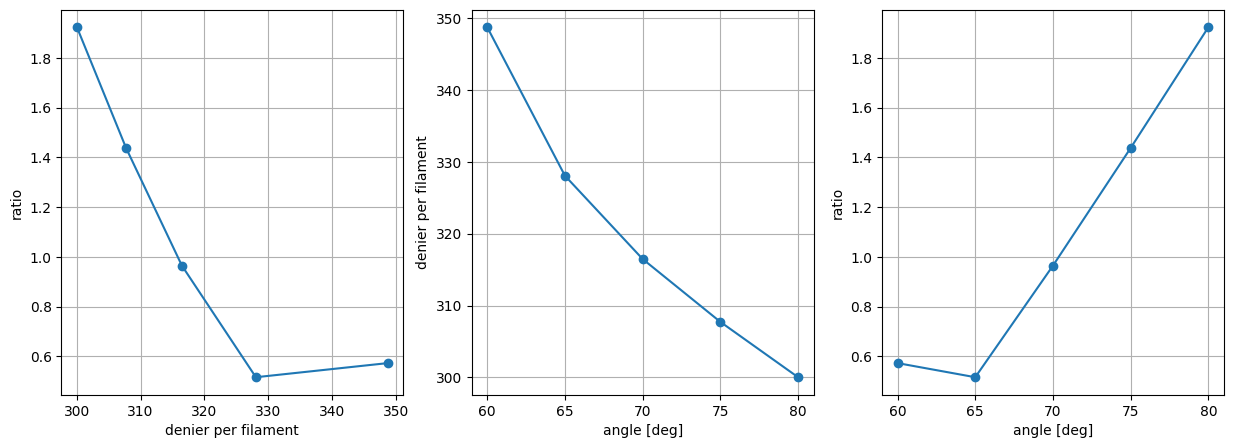

In [27]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(deniers,ratios,'o-')
plt.xlabel("denier per filament")
plt.ylabel("ratio")
plt.grid()
plt.subplot(1,3,2)
plt.plot(angles,deniers,'o-')

plt.xlabel("angle [deg]")
plt.ylabel("denier per filament")
plt.grid()
plt.subplot(1,3,3)
plt.plot(angles,ratios,'o-')
plt.xlabel("angle [deg]")
plt.ylabel("ratio")
plt.grid()

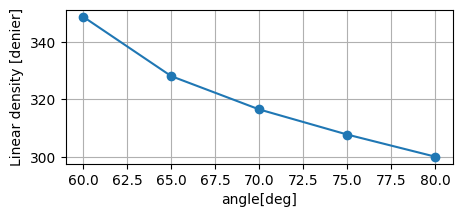

In [28]:
fig = plt.figure(figsize=(5,2))
plt.plot(angles,deniers,'o-')
plt.ylabel("Linear density [denier]")
plt.xlabel("angle[deg]")
plt.grid()

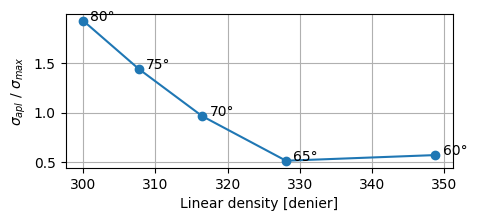

In [37]:
fig = plt.figure(figsize=(5,2))
plt.plot(deniers,ratios,'o-')
plt.xlabel("Linear density [denier]")
# plt.ylabel("ratio")
plt.ylabel(r"${\sigma_{apl}} \ / \ {\sigma_{max}}$")
theta = [r["infl_params"]["theta"] for r in results]
# text 
for i in range(len(deniers)):
    plt.text(deniers[i]+ 1,ratios[i],str(round(theta[i]*(180/np.pi)))+"°")
plt.grid()

In [30]:
height = [r["infl_params"]["height"] for r in results]
height

[16.162431064179074,
 15.843521086791096,
 15.933014715477132,
 15.899178893639847,
 15.681163893898079]

In [31]:
fig = plt.figure(figsize=(10,5))
#padding
plt.subplots_adjust(wspace=0.5,hspace=0.5)

y = [ ]


<Figure size 1000x500 with 0 Axes>

In [32]:
results[0]["infl_params"]

{'pressure': 800,
 'output_folder': 'output/2024-01-22__14-53-22__50418/2024-01-22__14-53-22__15024/inflation',
 'denier_per_filament': 348.7582484803582,
 'theta': 1.0471975511965976,
 'height': 16.162431064179074}

In [33]:
# remove folder
os.system("rm -r frds/")
os.mkdir("frds/")
for i,isp in enumerate(sim_path):
    frds = glob.glob(os.path.join(isp,"simulation","*.frd"))
    full_frd = os.path.join(isp,"simulation","full.frd")
    #open full frd and add all frds
    with open(full_frd,"w") as f:
        for frd in frds:
            with open(frd,"r") as f2:
                f.write(f2.read())
    # copy to frds folder
    os.system("cp " + full_frd + " frds/" + str(i) + ".frd")

In [34]:
23684/(3600)

6.578888888888889